In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
test_input.shape

(10000, 28, 28)

In [ ]:
import numpy as np
np.unique(train_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

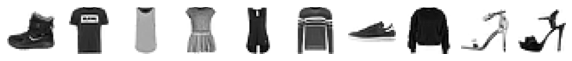

In [ ]:
# 데이터 균형이 맞춰져있어야함
# 오른다100만개 / 떨어진다1000개

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize = (10, 10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')

In [ ]:
# 0 : 티셔츠 / 1 : 바지 / 9 : 앵클부츠

train_target

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
np.unique(test_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

train_scaled = train_input / 255
test_scaled = test_input / 255
val_scaled = val_input / 255

cp = keras.callbacks.ModelCheckpoint("best.h5", save_best_only=True)
es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model = keras.Sequential()
model.add(keras.layers.Layer(input_shape = (28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

# adam : 학습률 조정
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy',
              optimizer='adam')

hist = model.fit(train_scaled, train_target,
          epochs = 10000,
          validation_data = (val_scaled, val_target),
          callbacks = [cp, es])

Epoch 1/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7352 - accuracy: 0.7473 - val_loss: 0.4570 - val_accuracy: 0.8342
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5284 - accuracy: 0.8112 - val_loss: 0.4199 - val_accuracy: 0.8465
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4904 - accuracy: 0.8226 - val_loss: 0.4099 - val_accuracy: 0.8483
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4716 - accuracy: 0.8305 - val_loss: 0.3989 - val_accuracy: 0.8540
Epoch 5/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4583 - accuracy: 0.8326 - val_loss: 0.3939 - val_accuracy: 0.8544
Epoch 6/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4468 - accuracy: 0.8374 - val_loss: 0.3864 - val_accuracy: 0.8555
Epoch 7/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4384 - accuracy: 0.8404 - val_loss: 0

In [ ]:
train_scaled.shape

(48000, 28, 28)

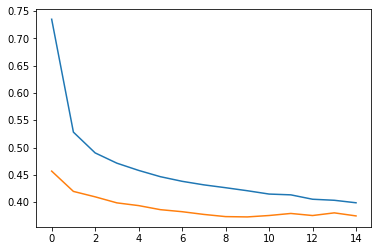

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8538


[0.3993547558784485, 0.8537999987602234]

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

pred = model.predict(test_scaled[0].reshape(1, 784))

ValueError: ignored

In [ ]:
plt.bar(range(10), pred[0])

In [ ]:
classes[np.argmax(pred)]

In [ ]:
from typing import Sequence
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 사진개수/가로길이/세로길이/흑백
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2)) # 사진을 2배로 줄인다.

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

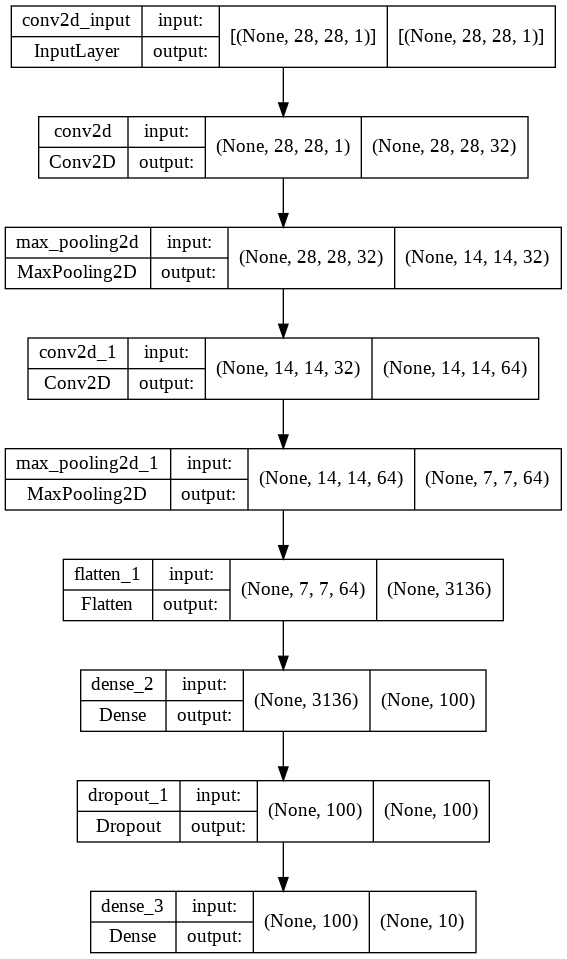

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy',
              optimizer='adam')



hist = model.fit(train_scaled, train_target,
          epochs = 10000,
          validation_data = (val_scaled, val_target),
          callbacks = [cp, es])

Epoch 1/10000
1500/1500 [==============================] - 59s 39ms/step - loss: 0.5181 - accuracy: 0.8150 - val_loss: 0.3485 - val_accuracy: 0.8691
Epoch 2/10000
 359/1500 [======>.......................] - ETA: 41s - loss: 0.3646 - accuracy: 0.8674

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_scaled, test_target)

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(keras.layers.Conv2D(256, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(4096, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1000, activation = 'softmax'))

model.summary()

In [ ]:
# 영화 리뷰 데이터(텍스트) / 정답1,0 긍정1 부정0
from tensorflow.keras.datasets import imdb

In [ ]:
# 입력층의 모양

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_input.shape

(25000,)

In [ ]:
test_input.shape

(25000,)

In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
train_target[0]

1

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

In [ ]:
lengths = np.array([len(x) for x in train_input])
lengths

array([502, 180,  98, ..., 138, 474, 173])

(array([1.4079e+04, 4.3190e+03, 1.1040e+03, 4.1200e+02, 7.2000e+01,
        6.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  259.3,  507.6,  755.9, 1004.2, 1252.5, 1500.8, 1749.1,
        1997.4, 2245.7, 2494. ]),
 <a list of 10 Patch objects>)

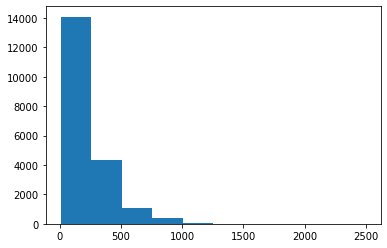

In [ ]:
plt.hist(lengths)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100, truncating = 'pre') # post : 뒤에서 자르는 것
test_seq = pad_sequences(test_input, maxlen = 100, truncating = 'pre')
val_seq = pad_sequences(val_input, maxlen = 100, truncating = 'pre')

In [ ]:
train_seq[8]

array([  2,   4, 275,   2,  71,  32, 184,   2,  21,  13,   2,   4,   2,
        71,   2,  13,   2,   2,   8,  67,   4,   2,   2,   5,  81,  49,
         2,   2,  23,   4,   2,  21,  12, 115,   2,  13,  16,   2,   8,
        67,   4,   2,  81,  49,   2,   2,   2,  21,  12, 115,   2,  13,
        16,   2,   8,  67,   4,   2,  11,   4,  20,  18,  53,  74,   2,
         2, 234,  21,  12, 115,   2,  11, 346,  24,  76,   2,   4,   2,
         9,  32, 184,   2,  92,  30,   2,  43,   2,  14,  20,  47,   6,
       114,  12, 127,  24, 384,  45,   6,  52,  31], dtype=int32)

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
test_oh = keras.utils.to_categorical(test_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
train_oh.shape

(20000, 100, 500)

In [ ]:
train_oh[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_seq[0]

array([ 28,   2,   2,   8,   6,   2,   2, 114,  45, 220,  17,  48, 294,
        43,   2,   6, 171,   2, 114,   2,   2,  98,  83,   6,   2,   5,
        95,   2,   2,   2,  98,  11,   2,   8,  97,   6,  20, 444,   2,
        25,  26,   6,   2, 254,   2,   2, 337,  42, 119, 233, 363,  93,
        11,   4,   2,  14,  31,   9,  31,  25,  70,   2,   2,  24, 394,
        21, 434,  24,  52,  10,  10,  34,   4,  96,   4,   2,  37, 299,
         2,   2,   2,  41,   2,   8, 162,   2,   2,   2,  66,  16, 394,
        13, 104,  59,  16, 424,   8,  30,  13, 104], dtype=int32)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# 네이버영화 / 평점
# 일베(1)/오유(0)
# 이미지 / 다리(균열, 박리, 누수, 철근노출)
# 창업 : 황달

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

hist = model.fit(train_oh, train_target, epochs = 10000,
          validation_data = (val_oh, val_target),
          callbacks = [es])

In [ ]:
plt.plot(hist.history['loss'][:-5])
plt.plot(hist.history['val_loss'][:-5])

plt.plot(hist.history['accuracy'][:-5])
plt.plot(hist.history['val_accuracy'][:-5])

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])

In [ ]:
model.evaluate(test_oh, test_target)

In [ ]:
train_oh[0]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_shape = (100,)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

hist = model.fit(train_seq, train_target, epochs = 10000,
          validation_data = (val_seq, val_target),
          callbacks = [es])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_shape = (100,)))
model.add(keras.layers.LSTM(8))
#model.add(keras.layers.LSTM(8)) 두개를 이을 수는 없다.  첫번째 layer의 output이 하나로 압축되어 두번째 layer에 input이 들어가기 때문. 두 개를 잇는 방법은 아래에 다시 만들었음
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

hist = model.fit(train_seq, train_target, epochs = 10000,
          validation_data = (val_seq, val_target),
          callbacks = [es])

Epoch 1/10000
625/625 [==============================] - 20s 28ms/step - loss: 0.5446 - accuracy: 0.7191 - val_loss: 0.4596 - val_accuracy: 0.7828
Epoch 2/10000
625/625 [==============================] - 18s 29ms/step - loss: 0.4393 - accuracy: 0.7945 - val_loss: 0.4435 - val_accuracy: 0.7908
Epoch 3/10000
625/625 [==============================] - 16s 25ms/step - loss: 0.4215 - accuracy: 0.8061 - val_loss: 0.4315 - val_accuracy: 0.7974
Epoch 4/10000
625/625 [==============================] - 16s 26ms/step - loss: 0.4114 - accuracy: 0.8084 - val_loss: 0.4316 - val_accuracy: 0.7962
Epoch 5/10000
625/625 [==============================] - 15s 25ms/step - loss: 0.4071 - accuracy: 0.8109 - val_loss: 0.4316 - val_accuracy: 0.7956
Epoch 6/10000
625/625 [==============================] - 15s 25ms/step - loss: 0.4012 - accuracy: 0.8157 - val_loss: 0.4350 - val_accuracy: 0.8010
Epoch 7/10000
625/625 [==============================] - 16s 25ms/step - loss: 0.3957 - accuracy: 0.8181 - val_loss: 0

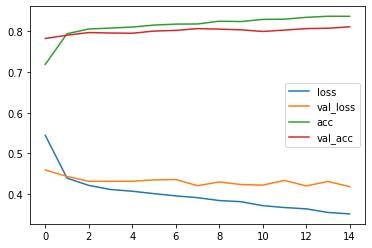

In [ ]:
plt.plot(hist.history['loss'][:-5])
plt.plot(hist.history['val_loss'][:-5])

plt.plot(hist.history['accuracy'][:-5])
plt.plot(hist.history['val_accuracy'][:-5])

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])

In [ ]:
model.evaluate(test_seq, test_target) # 여기에는 test_seq를 넣어주어야 한다.

782/782 [==============================] - 10s 12ms/step - loss: 0.4200 - accuracy: 0.8111


[0.41996830701828003, 0.8111199736595154]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_shape = (100,)))
model.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model.add(keras.layers.LSTM(8, dropout = 0.25)) # 이렇게 LSTM 안에 dropout도 넣을 수 있다.
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

hist = model.fit(train_seq, train_target, epochs = 10000,
          validation_data = (val_seq, val_target),
          callbacks = [es])

Epoch 1/10000
625/625 [==============================] - 61s 49ms/step - loss: 0.5404 - accuracy: 0.7184 - val_loss: 0.4588 - val_accuracy: 0.7842
Epoch 2/10000
625/625 [==============================] - 30s 47ms/step - loss: 0.4543 - accuracy: 0.7897 - val_loss: 0.4651 - val_accuracy: 0.7870
Epoch 3/10000
625/625 [==============================] - 29s 46ms/step - loss: 0.4357 - accuracy: 0.7987 - val_loss: 0.4339 - val_accuracy: 0.7998
Epoch 4/10000
625/625 [==============================] - 29s 46ms/step - loss: 0.4253 - accuracy: 0.8030 - val_loss: 0.4254 - val_accuracy: 0.8040
Epoch 5/10000
625/625 [==============================] - 29s 47ms/step - loss: 0.4166 - accuracy: 0.8084 - val_loss: 0.4252 - val_accuracy: 0.8026
Epoch 6/10000
625/625 [==============================] - 30s 47ms/step - loss: 0.4089 - accuracy: 0.8105 - val_loss: 0.4184 - val_accuracy: 0.8096
Epoch 7/10000
625/625 [==============================] - 29s 47ms/step - loss: 0.4084 - accuracy: 0.8122 - val_loss: 0

In [ ]:
plt.plot(hist.history['loss'][:-5])
plt.plot(hist.history['val_loss'][:-5])

plt.plot(hist.history['accuracy'][:-5])
plt.plot(hist.history['val_accuracy'][:-5])

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])

In [ ]:
model.evaluate(test_seq, test_target) # 여기에는 test_seq를 넣어주어야 한다.

In [ ]:
# 감정 분석 : 뉴스 데이터를 분석하여 긍정적으로 쓰였는지 부정적으로 쓰였는지 판단

from bs4 import BeautifulSoup
import requests
import time
import pandas as pd

knu = pd.read_csv("knu_sentiment_lexicon.csv")
knu

,word,polarity
0,ㅡㅡ,-1
1,ㅠㅠ,-1
2,ㅠ_ㅠ,-1
3,ㅠ,-1
4,ㅜㅡ,-1
...,...,...
14849,(^-^),1
14850,(;_;),-1
14851,(-_-),-1
14852,(-;,1


In [ ]:
# 군산대학교에서 만든 감성사전 : 많이 사용된다.
for i,j in zip(knu['word'], knu['polarity']) : # 부정적인 것이 - 점수를 받고 긍정적인 점수가 + 점수를 받는다.
    print(i,j)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
무서워하는 -2
무서워서 지르는 -2
무서워서 간신히 -2
무서워서 -2
무서워 -2
무서움을 느낄 -2
무서움을 -2
무서움 때문에 -2
무서움 -2
무서울 정도로 -2
무서울 -2
무서운 사람 -2
무서운 말이나 -2
무서운 느낌이 -2
무서운 꿈에 -2
무서운 -2
무사히 1
무분별한 -2
무모한 -1
무모하다 -1
무리하다 -1
무리하게 -1
무리에서 기피하여 -1
무리에서 기피되어 -1
무릎이 시리고 -1
무르고 부드럽다 1
무르고 부드러운 1
무르게 생긴 -1
무료로 1
무례함 -2
무례한 사람을 -2
무례한 데가 -2
무례한 것으로 -2
무례한 -2
무례하다 -2
무량한 마음을 1
무뚝뚝하다 -1
무디다 -2
무더위로 -2
무단결석 -2
무단 결석 -2
무능한 -1
무능하다 -1
무능력 -1
무뇌충 -2
무너짐 -2
무너지다 -2
무너지는 소리가 -2
무너지는 -2
무너지게 하다 -2
무너지게 -2
무너뜨리다 -2
무기력함 -1
무기력한 -2
무기력하다 -1
무기력 -2
무궁무진하다 1
무관심한 -1
무관심하다 -2
무관심 -1
무게가 있다 1
무게가 있는 1
무게가 있게 1
무게 있게 1
무겁다 -1
무겁고 투박하다 -2
무겁거나 하여 -1
무거운 분위기나 -2
무거운 발걸음으로 -2
무거운 기운이 -2
무거운 걸음으로 -2
무가치하고 무의미하게 -2
무가치하고 -2
무가치 -1
몽땅 없애다 -2
몽땅 빼앗거나 -2
못함을 -1
못할 만한 -1
못할 만큼 -1
못한 형편을 -2
못한 자는 -1
못한 상태이다 -2
못한 데가 -2
못한 -1
못하여 어수선하고 -2
못하여 안타깝다 -2
못하여 순진하고 -1
못하여 당하다 -2
못하여 -1
못하도록 억지로 -2
못하도록 -1
못하던 일 -1
못하던 -1
못하다 -2
못하는 상태로 -1
못하는 상태가 -2
못하는 상태 -1
못하는 모양 -1
못하는 결점 -2
못하고 희미하게 -1
못하고 허술한 -2
못하고 쪼들리게 -2
못하고 엉성하고 -

In [ ]:
# 강사님 코드 : 빈도 분석 코드 : 2일차 크롤링 수업에서 가져왔음
from tqdm import tqdm

total = [] # 제목 띄고 요약 내용 한꺼번에 저장

for n in tqdm(range(1, 3992, 10)) :
    url =requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%97%B0%EC%84%B8%EB%8C%80%ED%95%99%EA%B5%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=52&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n)) 
    html = BeautifulSoup(url.text)
    news = html.find("ul", class_="list_news").find_all("li", class_= "bx")

    for i in news :
        t = i.find('a', class_= 'news_tit').text
        c = i.find('div', class_='dsc_wrap').text
        total.append(t + ' ' + c)

    time.sleep(0.3)

100%|██████████| 400/400 [09:43<00:00,  1.46s/it]


In [ ]:
# 긍정은 1로 부정은 0으로 라벨링을 해 줄 것이다.

In [ ]:
total[0]

'\'화장실 불법촬영\' 혐의 연세대 의대생 "깊이 반성"  기소된 연세대 의대생 A(21)씨의 1차 공판기일을 진행했다. 검찰의 공소사실 낭독 후 A씨 측 변호인은 "모두... 검찰의 공소 요지에 따르면 A씨는 지난 6월17일부터 지난해 4일까지 총 32회에 걸쳐 연세대 의과 도서관 등 여자... '

In [ ]:
len(total)

4000

In [ ]:
import re # 램이 너무 힘들어하니까 500개만 짤라서 해보는 것임

dic2 = {}

for i in total:
    a = re.findall("[가-힣]{2,}", i) # [가-힣]{2,} : 이 뜻은 한글을 찾는데 2개 이상의 개수를 갖는 단어를 찾는다는 것 (가-힣 할 때 띄어쓰기 절대 금지)
    for j in a:
        if j not in dic2:
            dic2[j] = 1
        else:
            dic2[j] += 1

dic2_df = pd.DataFrame({
    "Word" : dic2.keys(),
    "Freq" : dic2.values()
})

dic2_df = dic2_df.sort_values(by = 'Freq', ascending = False)
dic2_df.index = range(len(dic2_df))
dic2_df = dic2_df.iloc[:500]
dic2_df

,Word,Freq
0,연세대,5179
1,연세대학교,1976
2,교수,911
3,있다,507
4,대학,437
...,...,...
495,뒷줄,33
496,내달,33
497,등에,32
498,설명,32


In [ ]:
import re

dic = {}
total2 = [] # 여기에는 숫자로 라벨링한 데이터들이 들어있다.
start = 2

for i in tqdm(total):
    a = re.findall("[가-힣]{2,}", i) # [가-힣]{2,} : 이 뜻은 한글을 찾는데 2개 이상의 개수를 갖는 단어를 찾는다는 것 (가-힣 할 때 띄어쓰기 절대 금지)
    box = []
    for j in a:
        if j not in dic:
            if j in list(dic2_df['Word']):
                dic[j] = start # 단어 하나하나마다 라벨링을 해주는 것이다.
                start += 1
            else:
                dic[j] = 1
        box.append(dic[j])
    total2.append(box)

100%|██████████| 4000/4000 [00:01<00:00, 3317.39it/s]


In [ ]:
scores = []

for i in tqdm(total):
    score = 0
    for j,k in zip(knu['word'], knu['polarity']):
        if j in i :
            score += k
    if score > 0:
        scores.append(1)
    else :
        scores.append(0)
# 텍스트마이닝 : 디버깅이 엄청 많이 필요. 예를 들어 '소름' 이라는 단어는 감정사전에는 -2라고 되어 있지만 실제로는 긍정적으로 쓰이는 경우도 많아

100%|██████████| 4000/4000 [00:27<00:00, 145.99it/s]


In [ ]:
data = np.array(total2)
target = np.array(scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
target.shape

(4000,)

In [ ]:
data[0]

[2,
 3,
 4,
 5,
 6,
 1,
 1,
 1,
 5,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 8,
 9,
 10,
 11,
 12,
 13,
 1,
 14,
 5,
 1,
 1,
 15]

In [ ]:
target[0]

0

In [ ]:
lengths = np.array([len(i) for i in data])
print(lengths)

[33 33 32 ... 29 26 27]


(array([   5.,    5.,    4.,   47.,  140.,  612., 1297., 1342.,  517.,
          31.]),
 array([ 3. ,  6.8, 10.6, 14.4, 18.2, 22. , 25.8, 29.6, 33.4, 37.2, 41. ]),
 <a list of 10 Patch objects>)

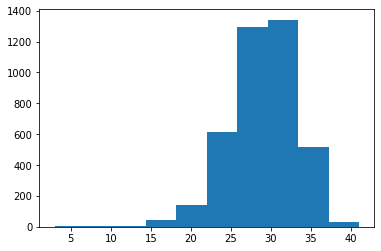

In [ ]:
plt.hist(lengths) # 뉴스 기사당 단어가 몇개가 들어있는지 확인하는 것

In [ ]:
# 강사 풀이
data2 = pad_sequences(data, maxlen=40, truncating='post') # 최대 단어 수를 40로 했다는 뜻
data2.shape

(4000, 40)

In [ ]:
start

502

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data2, target, test_size = 0.2)

In [ ]:
keras.utils.to_categorical(train_input).shape

(3200, 40, 502)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(502, 16, input_shape = (40,))) # 0과 1 포함해서 start가 502이므로 500개이므로 502가 input
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

hist = model.fit(train_input, train_target, epochs = 10000,
          validation_data = (test_input, test_target),
          callbacks = [es])

Epoch 1/10000
100/100 [==============================] - 6s 30ms/step - loss: 0.6676 - accuracy: 0.6141 - val_loss: 0.6507 - val_accuracy: 0.6162
Epoch 2/10000
100/100 [==============================] - 2s 22ms/step - loss: 0.5986 - accuracy: 0.6562 - val_loss: 0.5525 - val_accuracy: 0.7088
Epoch 3/10000
100/100 [==============================] - 2s 22ms/step - loss: 0.5380 - accuracy: 0.7250 - val_loss: 0.5210 - val_accuracy: 0.7250
Epoch 4/10000
100/100 [==============================] - 2s 22ms/step - loss: 0.4979 - accuracy: 0.7581 - val_loss: 0.5057 - val_accuracy: 0.7337
Epoch 5/10000
100/100 [==============================] - 2s 21ms/step - loss: 0.4796 - accuracy: 0.7706 - val_loss: 0.5241 - val_accuracy: 0.7163
Epoch 6/10000
100/100 [==============================] - 2s 22ms/step - loss: 0.4507 - accuracy: 0.7878 - val_loss: 0.4975 - val_accuracy: 0.7362
Epoch 7/10000
100/100 [==============================] - 2s 22ms/step - loss: 0.4458 - accuracy: 0.7931 - val_loss: 0.4985 -

In [ ]:
model.evaluate(test_input, test_target)

25/25 [==============================] - 0s 6ms/step - loss: 0.4975 - accuracy: 0.7362


[0.49753624200820923, 0.7362499833106995]

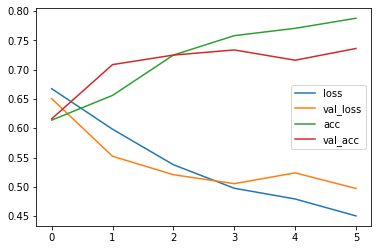

In [ ]:
plt.plot(hist.history['loss'][:-5])
plt.plot(hist.history['val_loss'][:-5])

plt.plot(hist.history['accuracy'][:-5])
plt.plot(hist.history['val_accuracy'][:-5])

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])

In [ ]:
from keras.datasets import cifar10
(train_input, train_target), (test_input, test_target) = cifar10.load_data()

In [ ]:
train_input.shape

(50000, 32, 32, 3)

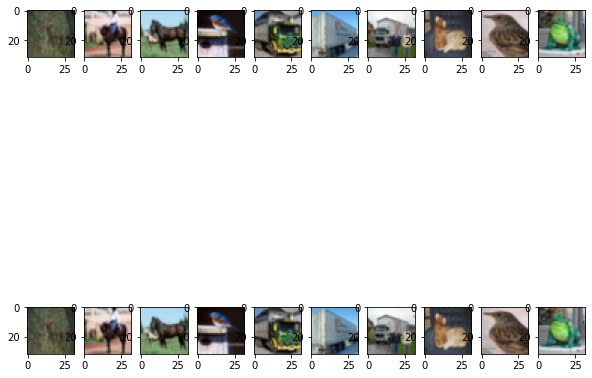

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,10,figsize = (10, 10))

for i in range(2) :
    for j in range(10):
        axs[i,j].imshow(train_input[1*10 + j])

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split


(train_input, train_target), (test_input, test_target) = cifar10.load_data()

train_input = train_input.astype("float32")
test_input = test_input.astype("float32")

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

train_scaled = train_input / 255
test_scaled = test_input / 255
val_scaled = val_input / 255

datagen = ImageDataGenerator( # 이렇게 이미지를 변형시키고 학습시키는 것이 좋아! 학습의 다양성을 높이는 것임
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip=True,
    vertical_flip=True
)

from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape = (32, 32, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy',
              optimizer = 'adam')

hist = model.fit_generator(datagen.flow(train_scaled, train_target), # 이미지를 조금씩 변형(반전이나 각도변경)하여서 생성하고 그 것으로 fit을 하는 것임
                           epochs = 10,
                           validation_data = (val_scaled, val_target))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
 259/1250 [=====>........................] - ETA: 40s - loss: 2.1713 - accuracy: 0.1706

KeyboardInterrupt: ignored